# Hình ảnh có dải động cao - High Dynamic Range (HDR)

**Satya Mallick, LearnOpenCV.com**

!["HDR Image Example"](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_10_high-dynamic-range-hdr.jpg)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Ý tưởng cơ bản

1. **Dải động** của hình ảnh bị giới hạn ở 8 bit (0 - 255) cho mỗi kênh

2. Các điểm ảnh rất sáng bão hòa ở mức 255

3. Các điểm ảnh rất tối cắt ở mức 0

# Bước 1: Chụp nhiều lần phơi sáng

!["HDR Image Sequence"](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_10_hdr-image-sequence.jpg)

In [2]:
def readImagesAndTimes():
    # Danh sách các file
    filenames = ["images/img_0.033.jpg", "images/img_0.25.jpg", "images/img_2.5.jpg", "images/img_15.jpg"]

    # Danh sách thời gian phơi sáng
    times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

    # Đọc các ảnh
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)

    return images, times

# Step 2: Align Images

![Aligned vs. Unaligned](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_10_aligned-unaligned-hdr-comparison.jpg)

In [3]:
# Đọc hình ảnh và thời gian phơi sáng
images, times = readImagesAndTimes()

# Căn chỉnh hình ảnh
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Bước 3: Ước tính chức năng phản hồi của camera

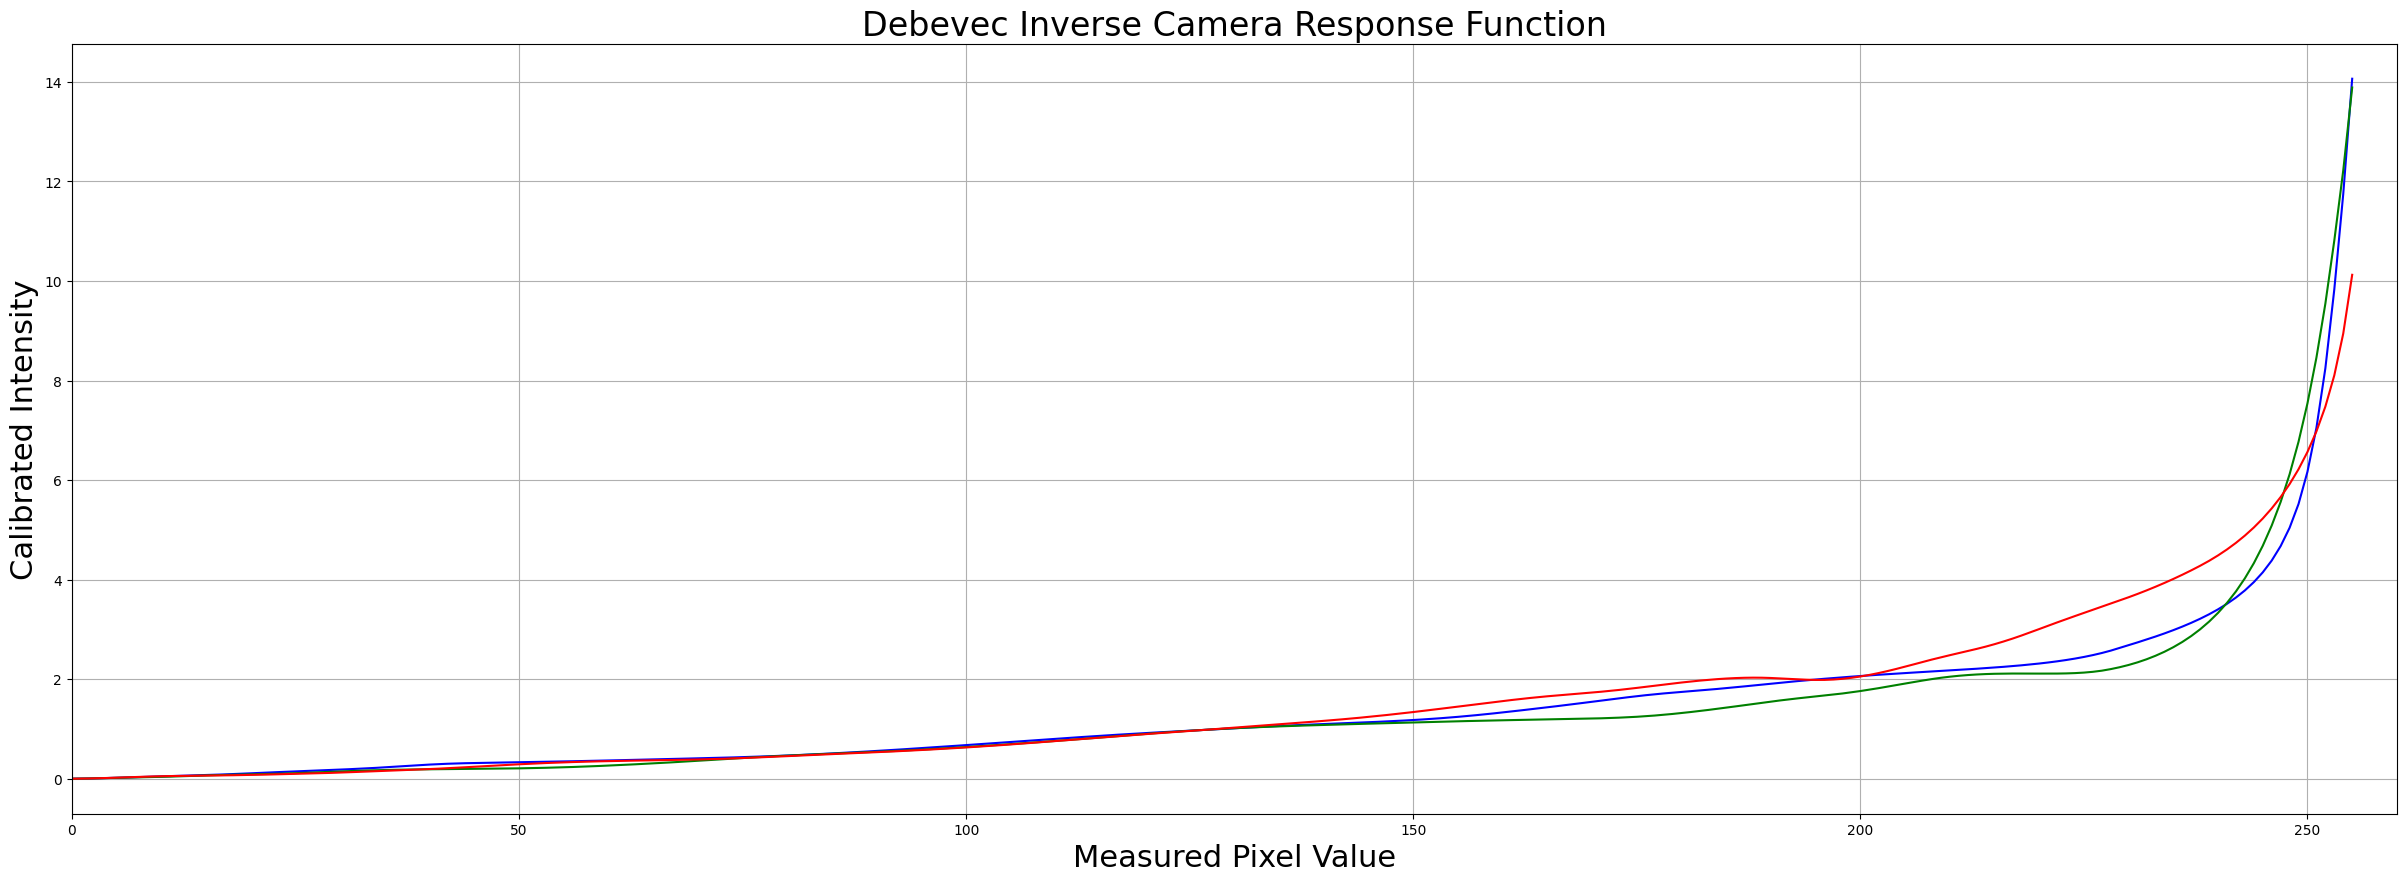

In [4]:
# Tìm chức năng phản hồi của camera
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Biểu diễn CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30, 10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "b", x, y[:, 1], "g", x, y[:, 2], "r")

# Bước 4: Hợp nhất Exposure vào một hình ảnh HDR

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0003295894..347.5544].


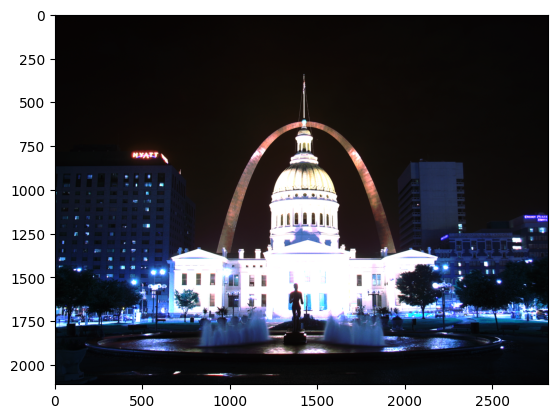

In [5]:
# Gộp hình ảnh thành hình ảnh tuyến tính HDR
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

plt.imshow(hdrDebevec)

# Bước 5: Tonemapping

Có nhiều thuật toán Tonemapping trong OpenCV, chọn Drago vì nó có nhiều điều khiển hơn.

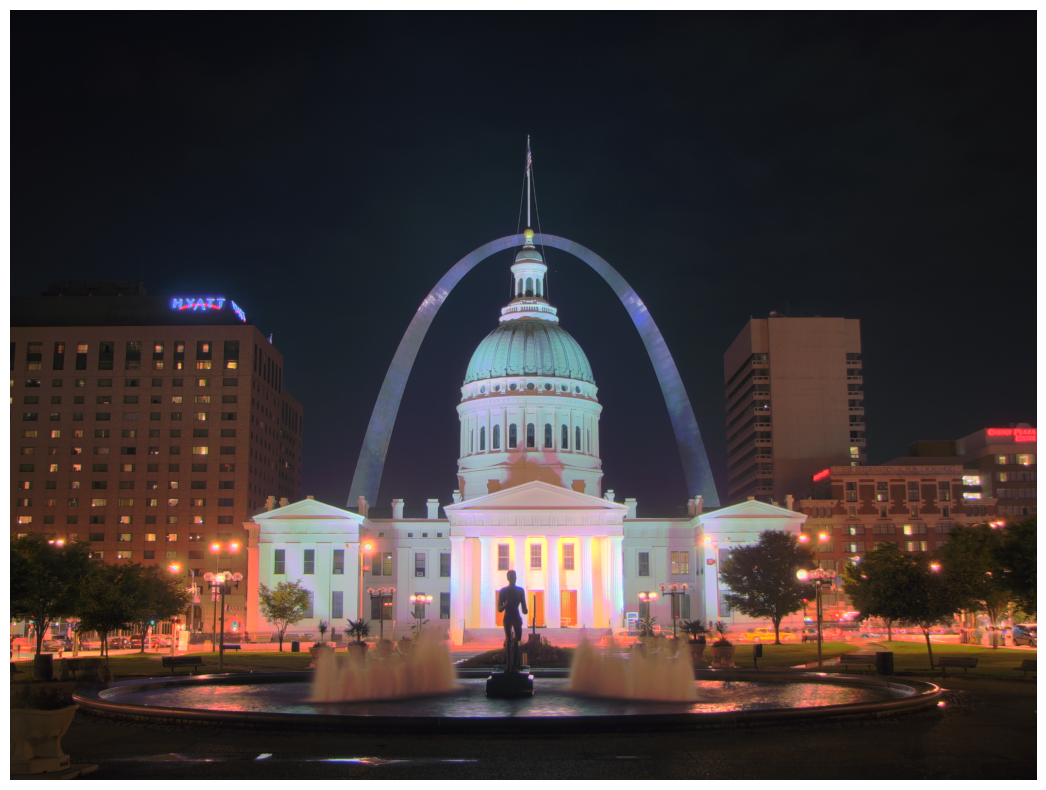

In [6]:
# Tonemap sử dụng phương pháp Drago để có được hình ảnh màu 24 bit
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago

# Lưu ảnh
cv2.imwrite("images/ldr-Drago.jpg", 255*ldrDrago)

# Biểu diễn ảnh
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrDrago, 0, 1)[:,:,::-1]);plt.axis("off");

Tonemaping using Reinhard's method ... 


(-0.5, 2815.5, 2111.5, -0.5)

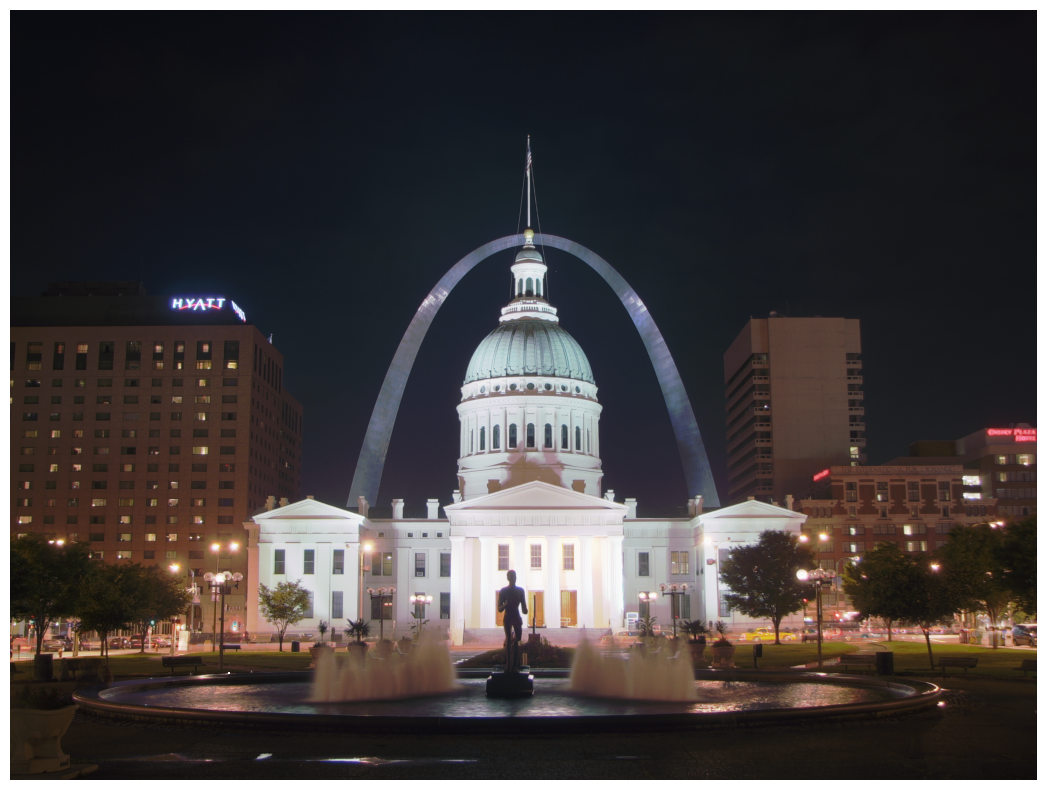

In [7]:
# Tonemap sử dụng phương pháp Reinhard để có được hình ảnh màu 24 bit
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0, 0, 0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)

# Lưu ảnh
cv2.imwrite("images/ldr-Reinhard.jpg", ldrReinhard * 255)

# Biểu diễn ảnh
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrReinhard, 0, 1)[:,:,::-1]);plt.axis("off")

Tonemaping using Mantiuk's method ... 


(-0.5, 2815.5, 2111.5, -0.5)

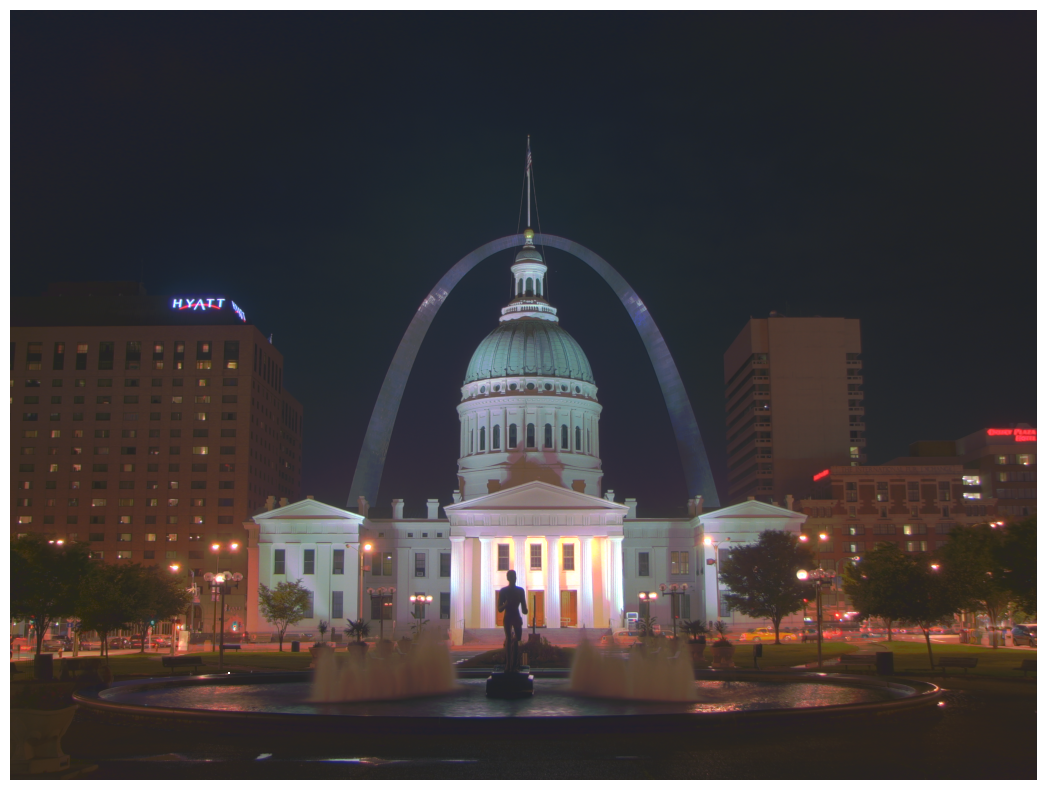

In [8]:
# Tonemap sử dụng phương pháp Mantiuk để có được ảnh màu 24 bit
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk

# save the image using cv2.imwrite
cv2.imwrite("images/ldr-Mantiuk.jpg", ldrMantiuk * 255)

# plot the image using plt.imshow
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrMantiuk, 0, 1)[:,:,::-1]);plt.axis("off")